In [1]:
import pandas as pd, glob, seaborn as sns;

In [46]:
df = pd.concat([pd.read_csv(f, parse_dates=['DATE_TIME'])
                for f in glob.glob('../src/solar_power_generation_india/*Generation*.csv')]
               , ignore_index = True)


In [47]:
df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [ ]:
df['date'] = pd.to_datetime(df['DATE_TIME'].dt.date)

In [180]:
df['time'] = df['DATE_TIME'].dt.hour

In [181]:
df.time

0          0
1          0
2          0
3          0
4          0
          ..
136471    23
136472    23
136473    23
136474    23
136475    23
Name: time, Length: 136476, dtype: int64

In [179]:
pd.to_datetime(df['DATE_TIME'], unit='s')

0        2020-05-15 00:00:00
1        2020-05-15 00:00:00
2        2020-05-15 00:00:00
3        2020-05-15 00:00:00
4        2020-05-15 00:00:00
                 ...        
136471   2020-06-17 23:45:00
136472   2020-06-17 23:45:00
136473   2020-06-17 23:45:00
136474   2020-06-17 23:45:00
136475   2020-06-17 23:45:00
Name: DATE_TIME, Length: 136476, dtype: datetime64[ns]

In [183]:
df['PLANT_ID'].value_counts()

4135001    68778
4136001    67698
Name: PLANT_ID, dtype: int64

In [184]:
df.shape

(136476, 9)

In [185]:
df.dtypes

DATE_TIME      datetime64[ns]
PLANT_ID                int64
SOURCE_KEY             object
DC_POWER              float64
AC_POWER              float64
DAILY_YIELD           float64
TOTAL_YIELD           float64
date           datetime64[ns]
time                    int64
dtype: object

In [186]:
gg = df.groupby(['PLANT_ID', 'time'])[['DC_POWER', 'AC_POWER', 'DAILY_YIELD']].mean()
gg=gg.reset_index()
# gg['time'] = gg['time'].astype(float)

In [187]:
df.pivot_table(values='DC_POWER', index='time', columns='PLANT_ID')

PLANT_ID,4135001,4136001
time,,
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
5,0.000000,0.003212
6,578.113622,58.695532
7,2551.386720,244.283851
8,5088.628218,507.486537


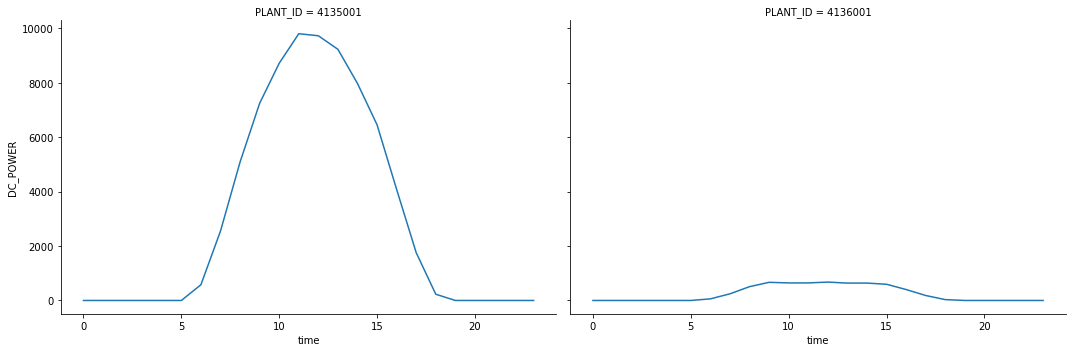

In [188]:
sns.relplot(x='time', y='DC_POWER', col='PLANT_ID', data=gg, kind='line', aspect=1.5)